In [2]:
import numpy as np
np.set_printoptions(threshold=3)
np.set_printoptions(suppress=True)
from numpy import genfromtxt
from matplotlib import pyplot as plt

In [3]:
numfields = 6
fieldwidth = 10
#groundTruth = np.loadtxt('ground_truth-2.txt',delimiter= ',')
#measurmens = np.loadtxt('pose-1.txt',delimiter= ',')(fieldwidth)+numfields
groundTruth = genfromtxt('ground_truth-2.txt', delimiter = '')
 
#Observations: position_X, position_Y
measurmens = genfromtxt('pose-1.txt')
control = genfromtxt('controls-1.txt')

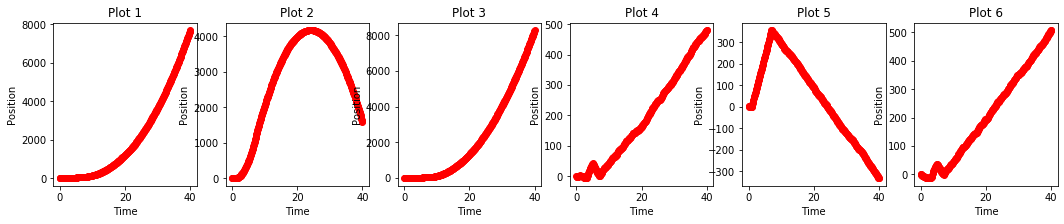

<Figure size 432x288 with 0 Axes>

In [4]:
time = groundTruth[2][0]
ground = groundTruth[2][1]
ground2 = groundTruth[2]
ground3 = groundTruth[3]
ground4 = groundTruth[4]
ground5 = groundTruth[5]
ground6 = groundTruth[6]
fig, axes = plt.subplots(1, 6, figsize=(18,3))
plt.figure()
#plt.subplot(2,2,1,figsize=(10,4))

for i in range(0,401):
    #print(groundTruth[i][0],groundTruth[i][1])
    axes[0].plot(groundTruth[i][0],groundTruth[i][1],'ro')
    axes[0].set_title("Plot 1")
    axes[0].set(xlabel= 'Time', ylabel='Position')
#print(time,ground)
#plt.plot(time,ground,'ro')

#plt.subplot(2,2,2,)
for i in range(0,401):
    #print(groundTruth[i][0],groundTruth[i][1])
    axes[1].plot(groundTruth[i][0],groundTruth[i][2],'ro')
    axes[1].set_title("Plot 2")
    axes[1].set(xlabel= 'Time', ylabel='Position')
#plt.subplot(2,2,3)
for i in range(0,401):
    #print(groundTruth[i][0],groundTruth[i][1])
    axes[2].plot(groundTruth[i][0],groundTruth[i][3],'ro')
    axes[2].set_title("Plot 3")
    axes[2].set(xlabel= 'Time', ylabel='Position')
#plt.subplot(4,2,1)
for i in range(0,401):
    #print(groundTruth[i][0],groundTruth[i][1])
    axes[3].plot(groundTruth[i][0],groundTruth[i][4],'ro')
    axes[3].set_title("Plot 4")
    axes[3].set(xlabel= 'Time', ylabel='Position')

#plt.subplot(4,2,2)
for i in range(0,401):
    #print(groundTruth[i][0],groundTruth[i][1])
    axes[4].plot(groundTruth[i][0],groundTruth[i][5],'ro')
    axes[4].set_title("Plot 5")
    axes[4].set(xlabel= 'Time', ylabel='Position')

#plt.subplot(4,2,3)
for i in range(0,401):
    #print(groundTruth[i][0],groundTruth[i][1])
    axes[5].plot(groundTruth[i][0],groundTruth[i][6],'ro')
    axes[5].set_title("Plot 6")
    axes[5].set(xlabel= 'Time', ylabel='Position')

#plt.show()

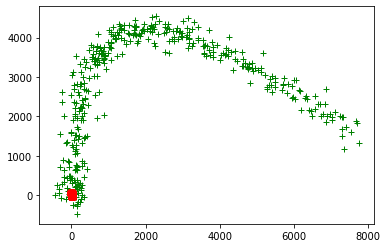

In [5]:
plt.figure()
for i in range(0,401):
    #print(groundTruth[i][0],groundTruth[i][1])
    plt.plot(control[i][1],control[i][2],'ro')
    plt.plot(measurmens[i][1],measurmens[i][2],'g+')
#print(time,ground)
#plt.plot(time,ground,'ro')
plt.plot(control[i][1],control[i][2],'k')
plt.show()


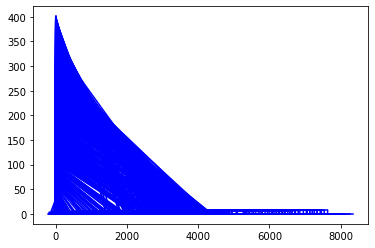

In [6]:
#Without Applyig Initial Uncertainity

def prediction(X_hat_t_1,P_t_1,F_t,B_t,U_t,Q_t):
    X_hat_t=F_t.dot(X_hat_t_1)+(B_t.dot(U_t).reshape(B_t.shape[0],-1) )
    P_t=np.diag(np.diag(F_t.dot(P_t_1).dot(F_t.transpose())))+Q_t
    return X_hat_t,P_t
    
 
def update(X_hat_t,P_t,Z_t,R_t,H_t):
    
    K_prime=P_t.dot(H_t.transpose()).dot( np.linalg.inv ( H_t.dot(P_t).dot(H_t.transpose()) +R_t ) )  
    #print("K:\n",K_prime)
    
    X_t=X_hat_t+K_prime.dot(Z_t-H_t.dot(X_hat_t))
    P_t=P_t-K_prime.dot(H_t).dot(P_t)
    
    return X_t,P_t
 
 
acceleration=0
delta_t=1/10#milisecond
 
groundTruth = genfromtxt('ground_truth-2.txt', delimiter = '')
 
#Observations: position_X, position_Y
measurmens = genfromtxt('pose-1.txt')
 
 
#Checking our result with OpenCV
#opencvKalmanOutput = genfromtxt('controls-1.txt', delimiter=',',skip_header=1)
 
#Transition matrix
F_t=np.array([ [1 ,0,delta_t,0] , [0,1,0,delta_t] , [0,0,1,0] , [0,0,0,1] ])
 
#Initial State cov
P_t= np.identity(4)*0.2
 
#Process cov
Q_t= np.identity(4)
 
#Control matrix
B_t=np.array( [ [0] , [0], [0] , [0] ])
 
#Control vector
U_t=acceleration
 
#Measurment Matrix
H_t = np.array([ [1, 0, 0, 0], [ 0, 1, 0, 0]])
 
#Measurment cov
R_t= np.identity(2)*5
 
# Initial State
X_hat_t = np.array( [[0],[0],[0],[0]] )

#print("X_hat_t",X_hat_t.shape)
#print("P_t",P_t.shape)
#print("F_t",F_t.shape)
#print("B_t",B_t.shape)
#print("Q_t",Q_t.shape)
#print("R_t",R_t.shape)
#print("H_t",H_t.shape)
x=[]
y=[]

for i in range(measurmens.shape[0]):
    X_hat_t,P_hat_t = prediction(X_hat_t,P_t,F_t,B_t,U_t,Q_t)
    #print("Prediction:")
    #print("X_hat_t:\n",X_hat_t,"\nP_t:\n",P_t)
    x.append(X_hat_t)
    y.append(P_hat_t)
    Z_t=measurmens[i].transpose()
    #Z_t=Z_t.reshape(Z_t.shape[0],-1)
    
    #print(Z_t.shape)
    
    X_t,P_t=update(X_hat_t,P_hat_t,Z_t,R_t,H_t)

    #plt.plot(X_t,P_t,'ro')
    
    #print("Update:")
    #print("X_t:\n",X_t,"\nP_t:\n",P_t)
    X_hat_t=X_t
    P_hat_t=P_t
    
    #print("=========================================")
    #print("Opencv Kalman Output:")
    #print("X_t:\n",opencvKalmanOutput[i])
    
for i in range(measurmens.shape[0]):
    X_hat_t,P_hat_t = prediction(X_hat_t,P_t,F_t,B_t,U_t,Q_t)
    #print("Prediction:")
    #print("X_hat_t:\n",X_hat_t,"\nP_t:\n",P_t)
    
    Z_t=measurmens[i].transpose()
    #Z_t=Z_t.reshape(Z_t.shape[0],-1)
    
    #print(Z_t.shape)
    
    X_t,P_t=update(X_hat_t,P_hat_t,Z_t,R_t,H_t)
    #print("Update:")
    #print("X_t:\n",X_t,"\nP_t:\n",P_t)
    X_hat_t=X_t
    P_hat_t=P_t
#plt.figure()
#print("x1","y1")
for (x1,y1) in zip(x,y):
    #print(x1,y1)
    plt.plot(x1,y1,'b')
plt.show()
#plt.subplot(2,2,1)
#plt.plot(X_t,P_t)
    
    #print("=========================================")
    #print("Opencv Kalman Output:")
    #print("X_t:\n",opencvKalmanOutput[i])

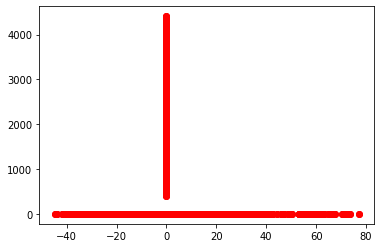

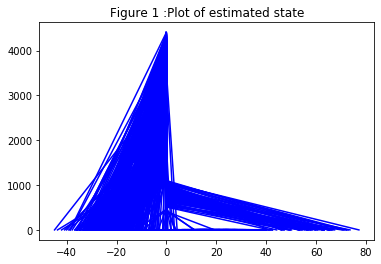

In [8]:
def prediction(X_hat_t_1,P_t_1,F_t,B_t,U_t,Q_t):
    X_hat_t=F_t.dot(X_hat_t_1)+(B_t.dot(U_t).reshape(B_t.shape[0],-1) )
    P_t=np.diag(np.diag(F_t.dot(P_t_1).dot(F_t.transpose())))+Q_t
    return X_hat_t,P_t
    
 
def update(X_hat_t,P_t,Z_t,R_t,H_t):
    
    K_prime=P_t.dot(H_t.transpose()).dot( np.linalg.inv ( H_t.dot(P_t).dot(H_t.transpose()) +R_t ) )  
    #print("K:\n",K_prime)
    
    X_t=X_hat_t+K_prime.dot(Z_t-H_t.dot(X_hat_t))
    P_t=P_t-K_prime.dot(H_t).dot(P_t)
    
    return X_t,P_t
 
 
acceleration=0
delta_t=1/10#milisecond
 
groundTruth = genfromtxt('ground_truth-2.txt', delimiter = '')
 
#Observations: position_X, position_Y
measurmens = genfromtxt('controls-1.txt')
 
 
#Checking our result with OpenCV
#opencvKalmanOutput = genfromtxt('controls-1.txt', delimiter=',',skip_header=1)
 
#Transition matrix
F_t=np.array([ [1 ,0,delta_t,0] , [0,1,0,delta_t] , [0,0,1,0] , [0,0,0,1] ])
 
#Initial State cov
P_t= np.diag(np.array([200,200,200,200]))*2
 
#Process cov
#_t= np.identity(6)
#Process noise 
Q_t =np.diag(np.array([10,10,10,10]))
#Control matrix
B_t=np.array( [ [0] , [0], [0] , [0]])
 
#Control vector
U_t=acceleration
 
#Measurment Matrix
H_t = np.array([ [1, 0, 0, 0], [ 0, 1, 0, 0]])
 
#easurment cov
R_t= np.identity(2)*5
'''
a= np.array([200,200,200,300,300,400]) 
R_t = np.diag(a) 
'''
# Initial State
X_hat_t = np.array( [[0],[0],[0],[0]] )
#print("X_hat_t",X_hat_t.shape)
#print("P_t",P_t.shape)
#print("F_t",F_t.shape)
#print("B_t",B_t.shape)
#print("Q_t",Q_t.shape)
#print("R_t",R_t.shape)
#print("H_t",H_t.shape)
x=[]
y=[]
 
for i in range(measurmens.shape[0]):
    X_hat_t,P_hat_t = prediction(X_hat_t,P_t,F_t,B_t,U_t,Q_t)
    #print("Prediction:")
    #print("X_hat_t:\n",X_hat_t,"\nP_t:\n",P_t)
    
    Z_t=measurmens[i].transpose()
    #Z_t=Z_t.reshape(Z_t.shape[0],-1)
    
    #print(Z_t.shape)
    
    X_t,P_t=update(X_hat_t,P_hat_t,Z_t,R_t,H_t)
    x.append(X_t)
    y.append(P_t)
    plt.plot(X_t,P_t,'ro')
    
    #print("Update:")
    #print("X_t:\n",X_t,"\nP_t:\n",P_t)
    X_hat_t=X_t
    P_hat_t=P_t
    
    #print("=========================================")
    #print("Opencv Kalman Output:")
    #print("X_t:\n",opencvKalmanOutput[i])
    
for i in range(measurmens.shape[0]):
    X_hat_t,P_hat_t = prediction(X_hat_t,P_t,F_t,B_t,U_t,Q_t)
    #print("Prediction:")
    #print("X_hat_t:\n",X_hat_t,"\nP_t:\n",P_t)
    
    Z_t=measurmens[i].transpose()
    #Z_t=Z_t.reshape(Z_t.shape[0],-1)
    
    #print(Z_t.shape)
    
    X_t,P_t=update(X_hat_t,P_hat_t,Z_t,R_t,H_t)
    #print("Update:")
    #print("X_t:\n",X_t,"\nP_t:\n",P_t)
    X_hat_t=X_t
    P_hat_t=P_t
plt.figure()
#print("x1","y1")
for (x1,y1) in zip(x,y):
    #print(x1,y1)
    plt.plot(x1,y1,'b')
    plt.title("Figure 1 :Plot of estimated state")
    #plt.xlabel("")
    #plt.ylabel("")

#plt.subplot(2,2,1)
#plt.plot(X_t,P_t)


In [ ]:
plt.show()
plt.figure()
x=np.reshape(x,(1,6416))
print(x)
print(measurmens[3][0])

for i in range(400):
    plt.plot(x,measurmens[3][0],'b')
    #print()
plt.title("Figure 2")
plt.show()
#plt.plot(x,measurmens[i][0],'b')
#plt.show()

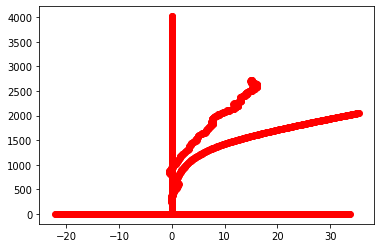

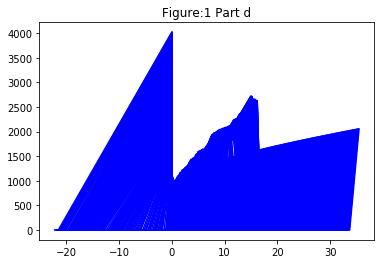

In [9]:
def prediction(X_hat_t_1,P_t_1,F_t,B_t,U_t,Q_t):
    X_hat_t=F_t.dot(X_hat_t_1)+(B_t.dot(U_t).reshape(B_t.shape[0],-1) )
    P_t=np.diag(np.diag(F_t.dot(P_t_1).dot(F_t.transpose())))+Q_t
    return X_hat_t,P_t
    
 
def update(X_hat_t,P_t,Z_t,R_t,H_t):
    
    K_prime=P_t.dot(H_t.transpose()).dot( np.linalg.inv ( H_t.dot(P_t).dot(H_t.transpose()) +R_t ) )  
    #print("K:\n",K_prime)
    
    X_t=X_hat_t+K_prime.dot(Z_t-H_t.dot(X_hat_t))
    P_t=P_t-K_prime.dot(H_t).dot(P_t)
    
    return X_t,P_t
 
 
acceleration=0
delta_t=1/10#milisecond
 
groundTruth = genfromtxt('ground_truth-2.txt', delimiter = '')
 
#Observations: position_X, position_Y
measurmens = genfromtxt('controls-1.txt')
 
 
#Checking our result with OpenCV
#opencvKalmanOutput = genfromtxt('controls-1.txt', delimiter=',',skip_header=1)
 
#Transition matrix
F_t=np.array([ [1 ,0,delta_t,0] , [0,1,0,delta_t] , [0,0,1,0] , [0,0,0,1] ])
 
#Initial State cov
P_t= np.diag(np.array([10,10,10,10]))
 
#Process cov
#_t= np.identity(6)
#Process noise 
Q_t =np.diag(np.array([10,10,10,10]))
#Control matrix
B_t=np.array( [ [0] , [0], [0] , [0]])
 
#Control vector
U_t=acceleration
 
#Measurment Matrix
H_t = np.array([ [1, 0, 0, 0], [ 0, 1, 0, 0]])
 
#easurment cov
R_t= np.diag(np.array([300**2,400**2]))
'''
a= np.array([200,200,200,300,300,400]) 
R_t = np.diag(a) 
'''
# Initial State
X_hat_t = np.array( [[0],[0],[0],[0]] )
#print("X_hat_t",X_hat_t.shape)
#print("P_t",P_t.shape)
#print("F_t",F_t.shape)
#print("B_t",B_t.shape)
#print("Q_t",Q_t.shape)
#print("R_t",R_t.shape)
#print("H_t",H_t.shape)
x=[]
y=[]
 
for i in range(measurmens.shape[0]):
    X_hat_t,P_hat_t = prediction(X_hat_t,P_t,F_t,B_t,U_t,Q_t)
    #print("Prediction:")
    #print("X_hat_t:\n",X_hat_t,"\nP_t:\n",P_t)
    
    Z_t=measurmens[i].transpose()
    #Z_t=Z_t.reshape(Z_t.shape[0],-1)
    
    #print(Z_t.shape)
    
    X_t,P_t=update(X_hat_t,P_hat_t,Z_t,R_t,H_t)
    x.append(X_t)
    y.append(P_t)
    plt.plot(X_t,P_t,'ro')
    
    #print("Update:")
    #print("X_t:\n",X_t,"\nP_t:\n",P_t)
    X_hat_t=X_t
    P_hat_t=P_t
    
    #print("=========================================")
    #print("Opencv Kalman Output:")
    #print("X_t:\n",opencvKalmanOutput[i])
    
for i in range(measurmens.shape[0]):
    X_hat_t,P_hat_t = prediction(X_hat_t,P_t,F_t,B_t,U_t,Q_t)
    #print("Prediction:")
    #print("X_hat_t:\n",X_hat_t,"\nP_t:\n",P_t)
    
    Z_t=measurmens[i].transpose()
    #Z_t=Z_t.reshape(Z_t.shape[0],-1)
    
    #print(Z_t.shape)
    
    X_t,P_t=update(X_hat_t,P_hat_t,Z_t,R_t,H_t)
    #print("Update:")
    #print("X_t:\n",X_t,"\nP_t:\n",P_t)
    X_hat_t=X_t
    P_hat_t=P_t
plt.figure()
#print("x1","y1")
for (x1,y1) in zip(x,y):
    #print(x1,y1)
    plt.plot(x1,y1,'b')
plt.title("Figure:1 Part d")
plt.show()
#plt.subplot(2,2,1)
#plt.plot(X_t,P_t)


[[ 0.         -0.00374466  0.0043604  ...  0.          0.
   0.        ]]
0.3


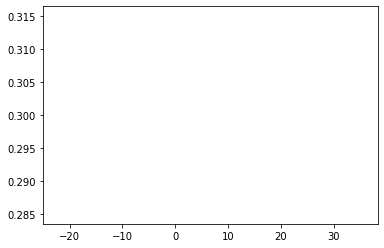

In [39]:
plt.show()
plt.figure()
x=np.reshape(x,(1,6416))
print(x)
print(measurmens[3][0])
for i in range(400):
    plt.plot(x,measurmens[3][0],'b')
    print()
plt.title("Figure:2 Part d")
plt.show()
#for i in range(400):
    #print()
    #plt.plot(x,measurmens[i][0],'b')
#plt.show()